# Feature Engineering - Estimateur de Prix de Voitures

**Projet:** Prédiction du prix de voitures d'occasion

**Auteur:** Luka Genot

---

## Objectif

Ce notebook effectue le **feature engineering** pour créer des features pertinentes à partir des données nettoyées. L'objectif est de transformer les données pour améliorer les performances des modèles de prédiction de prix.

## Pipeline

1. Chargement des données nettoyées
2. Création de features numériques
3. Création de features catégorielles
4. Features d'interaction
5. Features agrégées
6. Encodage des variables catégorielles
7. Normalisation des variables numériques
8. Analyse de corrélation
9. Export du dataset transformé

---
## 1. Imports et Configuration

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("crest")
%matplotlib inline

# Configuration pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Imports réussis")

Imports réussis


---
## 2. Chargement des Données Nettoyées

In [60]:
# Charger les données nettoyées (output du notebook de data cleaning)
# Note: Assurez-vous que le notebook de data cleaning a été exécuté et a sauvegardé le fichier
df = pd.read_csv('autos_cleaned.csv', encoding='latin1')

print("="*70)
print("CHARGEMENT DES DONNÉES NETTOYÉES")
print("="*70)
print(f"\nShape du dataset: {df.shape}")
print(f"Lignes: {df.shape[0]:,}")
print(f"Colonnes: {df.shape[1]}")
print(f"\nValeurs manquantes totales: {df.isnull().sum().sum()}")

CHARGEMENT DES DONNÉES NETTOYÉES

Shape du dataset: (325766, 21)
Lignes: 325,766
Colonnes: 21

Valeurs manquantes totales: 21985


In [61]:
# Aperçu des données
print("\nAperçu des premières lignes:")
display(df.head())


Aperçu des premières lignes:


,index,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,unknown,2016-03-24,0,70435,2016-04-07 03:16:57
1,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:46
2,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃÂRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


In [62]:
# Informations sur les colonnes
print("\nInformations sur les colonnes:")
print(df.info())


Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325766 entries, 0 to 325765
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                325766 non-null  int64 
 1   datecrawled          325766 non-null  object
 2   name                 325766 non-null  object
 3   seller               325766 non-null  object
 4   offertype            325766 non-null  object
 5   price                325766 non-null  int64 
 6   abtest               325766 non-null  object
 7   vehicletype          303781 non-null  object
 8   yearofregistration   325766 non-null  int64 
 9   gearbox              325766 non-null  object
 10  powerps              325766 non-null  int64 
 11  model                325766 non-null  object
 12  kilometer            325766 non-null  int64 
 13  monthofregistration  325766 non-null  int64 
 14  fueltype             325766 non-null  object
 15  br

In [63]:
# Statistiques descriptives
print("\nStatistiques descriptives:")
display(df.describe())


Statistiques descriptives:


,index,price,yearofregistration,powerps,kilometer,monthofregistration,nrofpictures,postalcode
count,325766.00,325766.00,325766.00,325766.00,325766.00,325766.00,325766.00,325766.00
mean,185767.88,9587.32,2003.63,121.11,125972.12,5.96,0.00,51235.75
std,107294.19,535627.54,7.03,185.25,39008.01,3.60,0.00,25747.79
min,0.00,101.00,1950.00,0.00,5000.00,0.00,0.00,1067.00
25%,92811.25,1350.00,1999.00,75.00,100000.00,3.00,0.00,30926.00
50%,185784.00,3300.00,2004.00,110.00,150000.00,6.00,0.00,50189.00
75%,278684.75,7800.00,2008.00,150.00,150000.00,9.00,0.00,72127.00
max,371527.00,99999999.00,2019.00,20000.00,150000.00,12.00,0.00,99998.00


---
## 3. Création de Features Numériques

Création de nouvelles variables numériques pertinentes pour prédire le prix.

In [64]:
print("="*70)
print("CRÉATION DE FEATURES NUMÉRIQUES")
print("="*70)

features_created = []

CRÉATION DE FEATURES NUMÉRIQUES


In [65]:
# 1. Âge du véhicule (TRÈS IMPORTANT pour le prix)
print("\n1. Création de l'âge du véhicule...")
df['car_age'] = 2024 - df['yearofregistration']
print(f"   car_age créée (min={df['car_age'].min()}, max={df['car_age'].max()})")
features_created.append('car_age')


1. Création de l'âge du véhicule...
   car_age créée (min=5, max=74)


In [66]:
# 2. Âge au carré (relation non-linéaire avec le prix)
print("\n2. Création de l'âge au carré...")
df['car_age_squared'] = df['car_age'] ** 2
print(f"   car_age_squared créée")
features_created.append('car_age_squared')


2. Création de l'âge au carré...
   car_age_squared créée


In [67]:
# 3. Kilométrage par année (intensité d'utilisation)
print("\n3. Création du kilométrage par année...")
df['km_per_year'] = df['kilometer'] / (df['car_age'] + 1)  # +1 pour éviter division par 0
print(f"   km_per_year créée (moyenne: {df['km_per_year'].mean():.0f} km/an)")
features_created.append('km_per_year')


3. Création du kilométrage par année...
   km_per_year créée (moyenne: 6406 km/an)


In [68]:
# 4. Log du kilométrage (normaliser la distribution)
print("\n4. Création du log du kilométrage...")
df['log_kilometer'] = np.log1p(df['kilometer'])
print(f"   log_kilometer créée")
features_created.append('log_kilometer')


4. Création du log du kilométrage...
   log_kilometer créée


In [69]:
# 5. Log de la puissance
print("\n5. Création du log de la puissance...")
df['log_power'] = np.log1p(df['powerps'])
print(f"   log_power créée")
features_created.append('log_power')


5. Création du log de la puissance...
   log_power créée


In [70]:
# 6. Puissance au carré
print("\n6. Création de la puissance au carré...")
df['power_squared'] = df['powerps'] ** 2
print(f"   power_squared créée")
features_created.append('power_squared')


6. Création de la puissance au carré...
   power_squared créée


In [71]:
# 7. Ratio puissance/kilométrage
print("\n7. Création du ratio puissance/kilométrage...")
df['power_km_ratio'] = df['powerps'] / (df['kilometer'] + 1)
print(f"   power_km_ratio créée")
features_created.append('power_km_ratio')


7. Création du ratio puissance/kilométrage...
   power_km_ratio créée


In [72]:
# 8. Catégories de kilométrage
print("\n8. Création des catégories de kilométrage...")
df['km_category'] = pd.cut(df['kilometer'],
                           bins=[0, 50000, 100000, 150000, 200000, 500000],
                           labels=['tres_faible', 'faible', 'moyen', 'eleve', 'tres_eleve'])
print(f"   km_category créée")
print(f"   Distribution:\n{df['km_category'].value_counts()}")
features_created.append('km_category')


8. Création des catégories de kilométrage...
   km_category créée
   Distribution:
km_category
moyen          244263
faible          52885
tres_faible     28618
eleve               0
tres_eleve          0
Name: count, dtype: int64


In [73]:
# 9. Catégories d'âge
print("\n9. Création des catégories d'âge...")
df['age_category'] = pd.cut(df['car_age'],
                            bins=[0, 3, 7, 15, 100],
                            labels=['neuf', 'recent', 'moyen', 'ancien'])
print(f"   age_category créée")
print(f"   Distribution:\n{df['age_category'].value_counts()}")
features_created.append('age_category')


9. Création des catégories d'âge...
   age_category créée
   Distribution:
age_category
ancien    247861
moyen      67307
recent     10598
neuf           0
Name: count, dtype: int64


In [74]:
# 10. Catégories de puissance
print("\n10. Création des catégories de puissance...")
df['power_category'] = pd.cut(df['powerps'],
                              bins=[0, 75, 120, 200, 1000],
                              labels=['faible', 'moyenne', 'elevee', 'tres_elevee'])
print(f"   power_category créée")
print(f"   Distribution:\n{df['power_category'].value_counts()}")
features_created.append('power_category')


10. Création des catégories de puissance...
   power_category créée
   Distribution:
power_category
elevee         109107
moyenne         94193
faible          70930
tres_elevee     29192
Name: count, dtype: int64


In [75]:
print(f"\nTotal features numériques créées: {len(features_created)}")


Total features numériques créées: 10


---
## 4. Création de Features Catégorielles Enrichies

Transformation et enrichissement des variables catégorielles.

In [76]:
print("="*70)
print("CRÉATION DE FEATURES CATÉGORIELLES")
print("="*70)

CRÉATION DE FEATURES CATÉGORIELLES


In [77]:
# 1. Regrouper les marques peu fréquentes
print("\n1. Regroupement des marques rares...")
brand_counts = df['brand'].value_counts()
print(f"   Nombre de marques uniques: {df['brand'].nunique()}")

# Garder les marques avec au moins 500 voitures
rare_brands = brand_counts[brand_counts < 500].index
df['brand_grouped'] = df['brand'].apply(lambda x: 'other' if x in rare_brands else x)
print(f"   brand_grouped créée ({df['brand_grouped'].nunique()} catégories)")
print(f"   Top 10 marques:\n{df['brand_grouped'].value_counts().head(10)}")
features_created.append('brand_grouped')


1. Regroupement des marques rares...
   Nombre de marques uniques: 39
   brand_grouped créée (34 catégories)
   Top 10 marques:
brand_grouped
volkswagen       69857
bmw              36249
opel             34879
mercedes_benz    32345
audi             29745
ford             22523
renault          15651
peugeot           9563
fiat              8311
seat              6337
Name: count, dtype: int64


In [78]:
# 2. Marques premium
print("\n2. Identification des marques premium...")
premium_brands = ['audi', 'bmw', 'mercedes_benz', 'porsche', 'jaguar', 'land_rover', 'mini', 'volvo']
df['is_premium'] = df['brand'].isin(premium_brands).astype(int)
print(f"   is_premium créée ({df['is_premium'].sum():,} voitures premium)")
features_created.append('is_premium')


2. Identification des marques premium...
   is_premium créée (107,937 voitures premium)


In [79]:
# 3. Marques économiques
print("\n3. Identification des marques économiques...")
economy_brands = ['skoda', 'seat', 'dacia', 'fiat', 'peugeot', 'renault', 'citroen', 'hyundai', 'kia']
df['is_economy'] = df['brand'].isin(economy_brands).astype(int)
print(f"   is_economy créée ({df['is_economy'].sum():,} voitures économiques)")
features_created.append('is_economy')


3. Identification des marques économiques...
   is_economy créée (56,166 voitures économiques)


In [80]:
# 4. Marques allemandes
print("\n4. Identification des marques allemandes...")
german_brands = ['volkswagen', 'audi', 'bmw', 'mercedes_benz', 'opel', 'porsche', 'smart']
df['is_german'] = df['brand'].isin(german_brands).astype(int)
print(f"   is_german créée ({df['is_german'].sum():,} voitures allemandes)")
features_created.append('is_german')


4. Identification des marques allemandes...
   is_german créée (209,182 voitures allemandes)


In [81]:
# 5. Transmission automatique
print("\n5. Identification des transmissions automatiques...")
df['is_automatic'] = (df['gearbox'] == 'automatik').astype(int)
print(f"   is_automatic créée ({df['is_automatic'].sum():,} transmissions automatiques)")
features_created.append('is_automatic')


5. Identification des transmissions automatiques...
   is_automatic créée (72,015 transmissions automatiques)


In [82]:
# 6. Type de carburant - flags binaires
print("\n6. Création des flags de carburant...")
df['is_diesel'] = (df['fueltype'] == 'diesel').astype(int)
df['is_benzin'] = (df['fueltype'] == 'benzin').astype(int)
df['is_electric'] = (df['fueltype'].isin(['elektro', 'hybrid'])).astype(int)
print(f"   is_diesel créée ({df['is_diesel'].sum():,})")
print(f"   is_benzin créée ({df['is_benzin'].sum():,})")
print(f"   is_electric créée ({df['is_electric'].sum():,})")
features_created.extend(['is_diesel', 'is_benzin', 'is_electric'])


6. Création des flags de carburant...
   is_diesel créée (99,983)
   is_benzin créée (201,741)
   is_electric créée (296)


In [83]:
# 7. Dommages non réparés
print("\n7. Traitement des dommages non réparés...")
df['has_damage'] = (df['notrepaireddamage'] == 'ja').astype(int)
print(f"   has_damage créée ({df['has_damage'].sum():,} voitures endommagées)")
features_created.append('has_damage')


7. Traitement des dommages non réparés...
   has_damage créée (30,200 voitures endommagées)


In [84]:
# 8. Type de véhicule - flags binaires
print("\n8. Création des flags de type de véhicule...")
if 'vehicletype' in df.columns:
    df['is_limousine'] = (df['vehicletype'] == 'limousine').astype(int)
    df['is_kombi'] = (df['vehicletype'] == 'kombi').astype(int)
    df['is_kleinwagen'] = (df['vehicletype'] == 'kleinwagen').astype(int)
    df['is_suv'] = (df['vehicletype'] == 'suv').astype(int)
    df['is_cabrio'] = (df['vehicletype'] == 'cabrio').astype(int)
    print(f"   Flags créés pour les types de véhicules")
    features_created.extend(['is_limousine', 'is_kombi', 'is_kleinwagen', 'is_suv', 'is_cabrio'])


8. Création des flags de type de véhicule...
   Flags créés pour les types de véhicules


---
## 5. Création de Features d'Interaction

Combinaisons de variables qui peuvent révéler des patterns cachés.

In [85]:
print("="*70)
print("CRÉATION DE FEATURES D'INTERACTION")
print("="*70)

CRÉATION DE FEATURES D'INTERACTION


In [86]:
# 1. Âge × Kilométrage
print("\n1. Interaction âge × kilométrage...")
df['age_km_interaction'] = df['car_age'] * df['log_kilometer']
print(f"   age_km_interaction créée")
features_created.append('age_km_interaction')


1. Interaction âge × kilométrage...
   age_km_interaction créée


In [87]:
# 2. Premium × Âge
print("\n2. Interaction premium × âge...")
df['premium_age'] = df['is_premium'] * df['car_age']
print(f"   premium_age créée")
features_created.append('premium_age')


2. Interaction premium × âge...
   premium_age créée


In [88]:
# 3. Premium × Puissance
print("\n3. Interaction premium × puissance...")
df['premium_power'] = df['is_premium'] * df['powerps']
print(f"   premium_power créée")
features_created.append('premium_power')


3. Interaction premium × puissance...
   premium_power créée


In [89]:
# 4. Dommages × Âge
print("\n4. Interaction dommages × âge...")
df['damage_age'] = df['has_damage'] * df['car_age']
print(f"   damage_age créée")
features_created.append('damage_age')


4. Interaction dommages × âge...
   damage_age créée


In [90]:
# 5. Automatique × Premium
print("\n5. Interaction automatique × premium...")
df['automatic_premium'] = df['is_automatic'] * df['is_premium']
print(f"   automatic_premium créée")
features_created.append('automatic_premium')


5. Interaction automatique × premium...
   automatic_premium créée


In [91]:
# 6. Diesel × Kilométrage
print("\n6. Interaction diesel × kilométrage...")
df['diesel_km'] = df['is_diesel'] * df['kilometer']
print(f"   diesel_km créée")
features_created.append('diesel_km')


6. Interaction diesel × kilométrage...
   diesel_km créée


In [92]:
# 7. Puissance × Âge
print("\n7. Interaction puissance × âge...")
df['power_age'] = df['powerps'] * df['car_age']
print(f"   power_age créée")
features_created.append('power_age')


7. Interaction puissance × âge...
   power_age créée


---
## 6. Création de Features Agrégées

Statistiques calculées par groupe (marque, année, etc.).

In [93]:
print("="*70)
print("CRÉATION DE FEATURES AGRÉGÉES")
print("="*70)

CRÉATION DE FEATURES AGRÉGÉES


In [94]:
# 1. Prix moyen par marque
print("\n1. Calcul du prix moyen par marque...")
brand_avg_price = df.groupby('brand')['price'].transform('mean')
df['brand_avg_price'] = brand_avg_price
print(f"   brand_avg_price créée")
features_created.append('brand_avg_price')


1. Calcul du prix moyen par marque...
   brand_avg_price créée


In [95]:
# 2. Écart-type du prix par marque
print("\n2. Calcul de la volatilité du prix par marque...")
brand_std_price = df.groupby('brand')['price'].transform('std')
df['brand_price_volatility'] = brand_std_price
print(f"   brand_price_volatility créée")
features_created.append('brand_price_volatility')


2. Calcul de la volatilité du prix par marque...
   brand_price_volatility créée


In [96]:
# 3. Prix moyen par année
print("\n3. Calcul du prix moyen par année...")
year_avg_price = df.groupby('yearofregistration')['price'].transform('mean')
df['year_avg_price'] = year_avg_price
print(f"   year_avg_price créée")
features_created.append('year_avg_price')


3. Calcul du prix moyen par année...
   year_avg_price créée


In [97]:
# 4. Popularité de la marque
print("\n4. Calcul de la popularité de la marque...")
brand_popularity = df.groupby('brand')['price'].transform('count')
df['brand_popularity'] = brand_popularity
print(f"   brand_popularity créée")
features_created.append('brand_popularity')


4. Calcul de la popularité de la marque...
   brand_popularity créée


In [98]:
# 5. Kilométrage médian par marque
print("\n5. Calcul du kilométrage médian par marque...")
brand_median_km = df.groupby('brand')['kilometer'].transform('median')
df['brand_median_km'] = brand_median_km
print(f"   brand_median_km créée")
features_created.append('brand_median_km')


5. Calcul du kilométrage médian par marque...
   brand_median_km créée


In [99]:
# 6. Puissance moyenne par marque
print("\n6. Calcul de la puissance moyenne par marque...")
brand_avg_power = df.groupby('brand')['powerps'].transform('mean')
df['brand_avg_power'] = brand_avg_power
print(f"   brand_avg_power créée")
features_created.append('brand_avg_power')


6. Calcul de la puissance moyenne par marque...
   brand_avg_power créée


In [100]:
# 7. Prix moyen par type de véhicule
print("\n7. Calcul du prix moyen par type de véhicule...")
if 'vehicletype' in df.columns:
    vehicle_avg_price = df.groupby('vehicletype')['price'].transform('mean')
    df['vehicle_type_avg_price'] = vehicle_avg_price
    print(f"   vehicle_type_avg_price créée")
    features_created.append('vehicle_type_avg_price')


7. Calcul du prix moyen par type de véhicule...
   vehicle_type_avg_price créée


In [101]:
# 8. Ratio par rapport au prix moyen de la marque
print("\n8. Calcul du ratio par rapport au prix moyen de la marque...")
df['price_ratio_to_brand'] = df['price'] / (df['brand_avg_price'] + 1)
print(f"   price_ratio_to_brand créée")
features_created.append('price_ratio_to_brand')


8. Calcul du ratio par rapport au prix moyen de la marque...
   price_ratio_to_brand créée


In [102]:
# 9. Ratio par rapport au prix moyen de l'année
print("\n9. Calcul du ratio par rapport au prix moyen de l'année...")
df['price_ratio_to_year'] = df['price'] / (df['year_avg_price'] + 1)
print(f"   price_ratio_to_year créée")
features_created.append('price_ratio_to_year')


9. Calcul du ratio par rapport au prix moyen de l'année...
   price_ratio_to_year créée


---
## 7. Encodage des Variables Catégorielles

Transformation des variables catégorielles en format numérique.

In [103]:
print("="*70)
print("ENCODAGE ONE-HOT DES VARIABLES CATÉGORIELLES")
print("="*70)

ENCODAGE ONE-HOT DES VARIABLES CATÉGORIELLES


In [104]:
# Liste des colonnes catégorielles à encoder
categorical_to_encode = [
    'brand_grouped',
    'vehicletype',
    'gearbox',
    'fueltype',
    'km_category',
    'age_category',
    'power_category'
]

# Garder seulement les colonnes qui existent
categorical_to_encode = [col for col in categorical_to_encode if col in df.columns]

print(f"\nColonnes à encoder: {categorical_to_encode}")
print(f"Shape avant encodage: {df.shape}")


Colonnes à encoder: ['brand_grouped', 'vehicletype', 'gearbox', 'fueltype', 'km_category', 'age_category', 'power_category']
Shape avant encodage: (325766, 61)


In [105]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True, dtype=int)

print(f"\nShape après encodage: {df_encoded.shape}")
print(f"Colonnes ajoutées par one-hot encoding: {df_encoded.shape[1] - df.shape[1]}")


Shape après encodage: (325766, 112)
Colonnes ajoutées par one-hot encoding: 51


In [106]:
# Supprimer les colonnes originales devenues inutiles
columns_to_drop = [
    'brand', 'model', 'seller', 'offertype', 'abtest',
    'notrepaireddamage', 'yearofregistration', 'monthofregistration'
]

# Ajouter les colonnes de dates si elles existent
date_columns = [col for col in df_encoded.columns if 'date' in col.lower()]
columns_to_drop.extend(date_columns)

# Filtrer pour garder seulement les colonnes qui existent
columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]

if columns_to_drop:
    print(f"\nSuppression des colonnes originales: {columns_to_drop}")
    df_encoded = df_encoded.drop(columns=columns_to_drop)
    print(f"Shape finale: {df_encoded.shape}")


Suppression des colonnes originales: ['brand', 'model', 'seller', 'offertype', 'abtest', 'notrepaireddamage', 'yearofregistration', 'monthofregistration', 'datecrawled', 'datecreated']
Shape finale: (325766, 102)


---
## 8. Normalisation des Variables Numériques

Standardisation pour améliorer les performances des modèles.

In [107]:
print("="*70)
print("NORMALISATION DES VARIABLES NUMÉRIQUES")
print("="*70)

NORMALISATION DES VARIABLES NUMÉRIQUES


In [108]:
# Séparer X et y
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (325766, 101)
y shape: (325766,)


In [109]:
# Identifier les colonnes numériques
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclure les colonnes binaires (0/1) de la normalisation
binary_cols = [col for col in numeric_cols if X[col].nunique() == 2]
numeric_to_scale = [col for col in numeric_cols if col not in binary_cols]

print(f"\nColonnes numériques totales: {len(numeric_cols)}")
print(f"Colonnes binaires (pas normalisées): {len(binary_cols)}")
print(f"Colonnes à normaliser: {len(numeric_to_scale)}")


Colonnes numériques totales: 99
Colonnes binaires (pas normalisées): 70
Colonnes à normaliser: 29


In [110]:
# Standardisation (moyenne=0, écart-type=1)
scaler = StandardScaler()
X[numeric_to_scale] = scaler.fit_transform(X[numeric_to_scale])

print(f"\nNormalisation effectuée avec StandardScaler")
print(f"Moyenne des colonnes normalisées: {X[numeric_to_scale].mean().mean():.6f}")
print(f"Écart-type des colonnes normalisées: {X[numeric_to_scale].std().mean():.6f}")


Normalisation effectuée avec StandardScaler
Moyenne des colonnes normalisées: -0.000000
Écart-type des colonnes normalisées: 0.896553


In [111]:
# Reconstituer le dataframe final
df_final = pd.concat([X, y], axis=1)

print(f"\nDataset final shape: {df_final.shape}")
print(f"Features: {df_final.shape[1] - 1}")
print(f"Target: price")


Dataset final shape: (325766, 102)
Features: 101
Target: price


In [112]:
# Vérifier et supprimer toutes les colonnes non-numériques restantes
print("Vérification des types de colonnes avant corrélation...")
print(f"\nTypes de données dans df_final:")
print(df_final.dtypes.value_counts())

# Identifier les colonnes non-numériques
non_numeric_cols = df_final.select_dtypes(include=['object']).columns.tolist()

if non_numeric_cols:
    print(f"\nColonnes non-numériques détectées : {non_numeric_cols}")
    print(f"Ces colonnes seront supprimées avant le calcul de corrélation.")
    df_final = df_final.drop(columns=non_numeric_cols)
    print(f"Shape après suppression : {df_final.shape}")
else:
    print("\nAucune colonne non-numérique détectée")

print(f"\nDataset prêt pour l'analyse de corrélation")

Vérification des types de colonnes avant corrélation...

Types de données dans df_final:
int64      71
float64    29
object      2
Name: count, dtype: int64

Colonnes non-numériques détectées : ['name', 'lastseen']
Ces colonnes seront supprimées avant le calcul de corrélation.
Shape après suppression : (325766, 100)

Dataset prêt pour l'analyse de corrélation


---
## 9. Analyse de Corrélation

Identification des features les plus importantes pour prédire le prix.

In [113]:
print("="*70)
print("ANALYSE DE CORRÉLATION AVEC LE PRIX")
print("="*70)

ANALYSE DE CORRÉLATION AVEC LE PRIX


In [114]:
# Calculer les corrélations
correlations = df_final.corr()['price'].abs().sort_values(ascending=False)

print(f"\nTop 30 features corrélées avec le prix:\n")
print(correlations.head(30).to_string())


Top 30 features corrélées avec le prix:

price                        1.00
price_ratio_to_brand         0.97
price_ratio_to_year          0.82
year_avg_price               0.03
vehicle_type_avg_price       0.01
brand_avg_price              0.01
power_category_tres_elevee   0.01
log_kilometer                0.01
brand_avg_power              0.01
automatic_premium            0.01
fueltype_unknown             0.01
age_category_ancien          0.01
age_category_moyen           0.01
brand_price_volatility       0.01
is_premium                   0.01
kilometer                    0.01
premium_power                0.01
brand_grouped_porsche        0.01
vehicletype_kleinwagen       0.01
is_kleinwagen                0.01
gearbox_manuell              0.01
is_automatic                 0.01
is_benzin                    0.01
fueltype_benzin              0.01
km_category_moyen            0.01
premium_age                  0.01
is_german                    0.00
power_category_moyenne       0.00
log_po

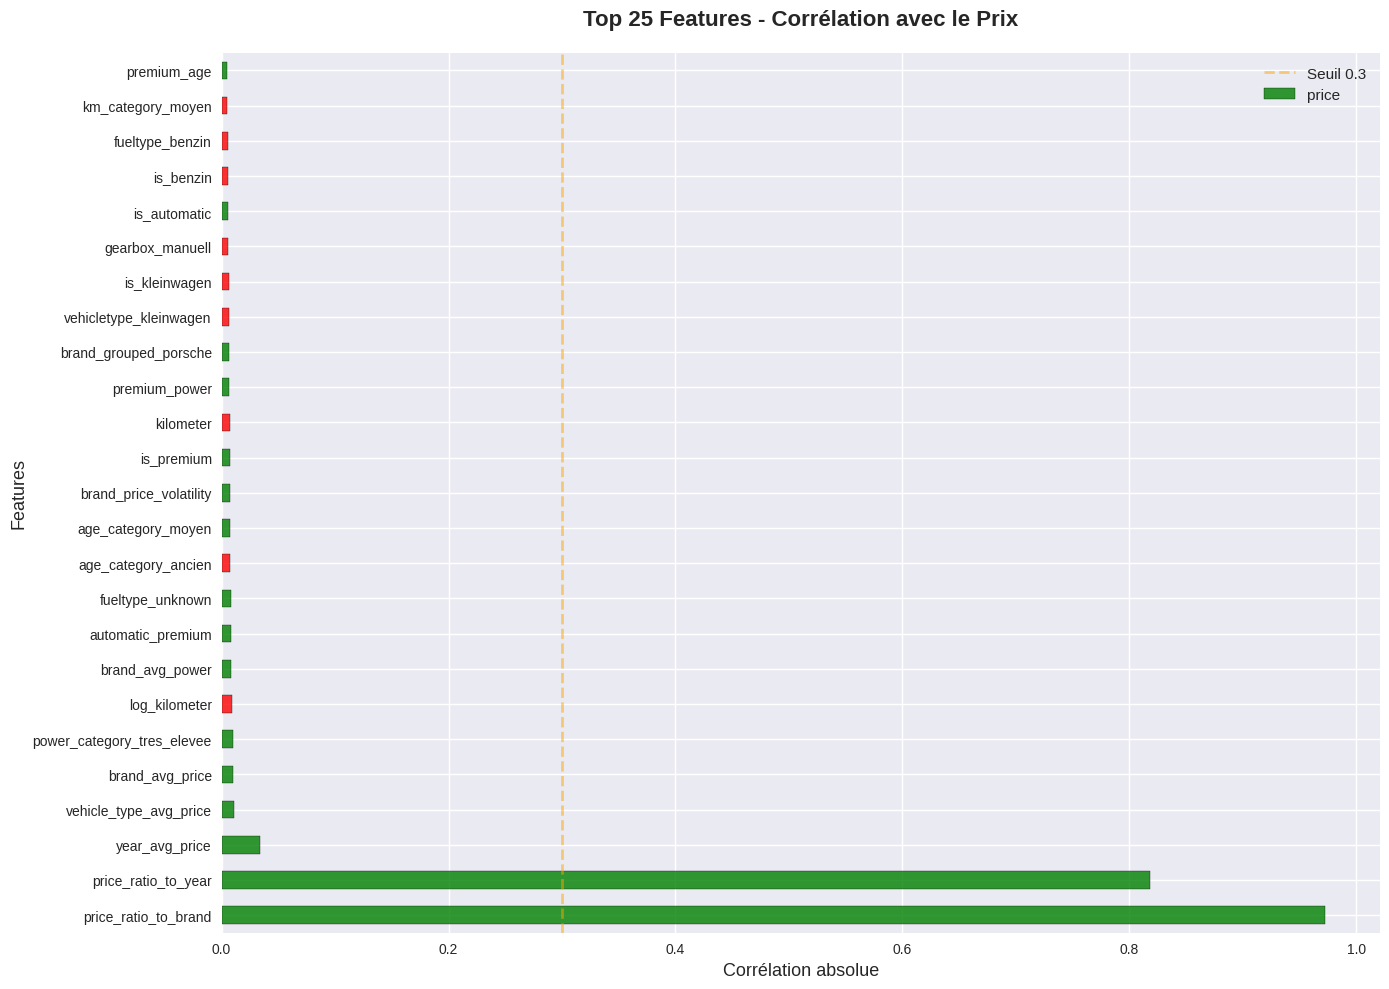

In [115]:
# Visualisation - Top 25 features
plt.figure(figsize=(14, 10))
top_corr = correlations.head(26)[1:]  # Exclure price lui-même
colors = ['green' if x > 0 else 'red' for x in df_final.corr()['price'][top_corr.index]]
top_corr.plot(kind='barh', color=colors, edgecolor='black', alpha=0.8)
plt.title('Top 25 Features - Corrélation avec le Prix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Corrélation absolue', fontsize=13)
plt.ylabel('Features', fontsize=13)
plt.axvline(x=0.3, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='Seuil 0.3')
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('feature_correlation_top25.png', dpi=300, bbox_inches='tight')
plt.show()

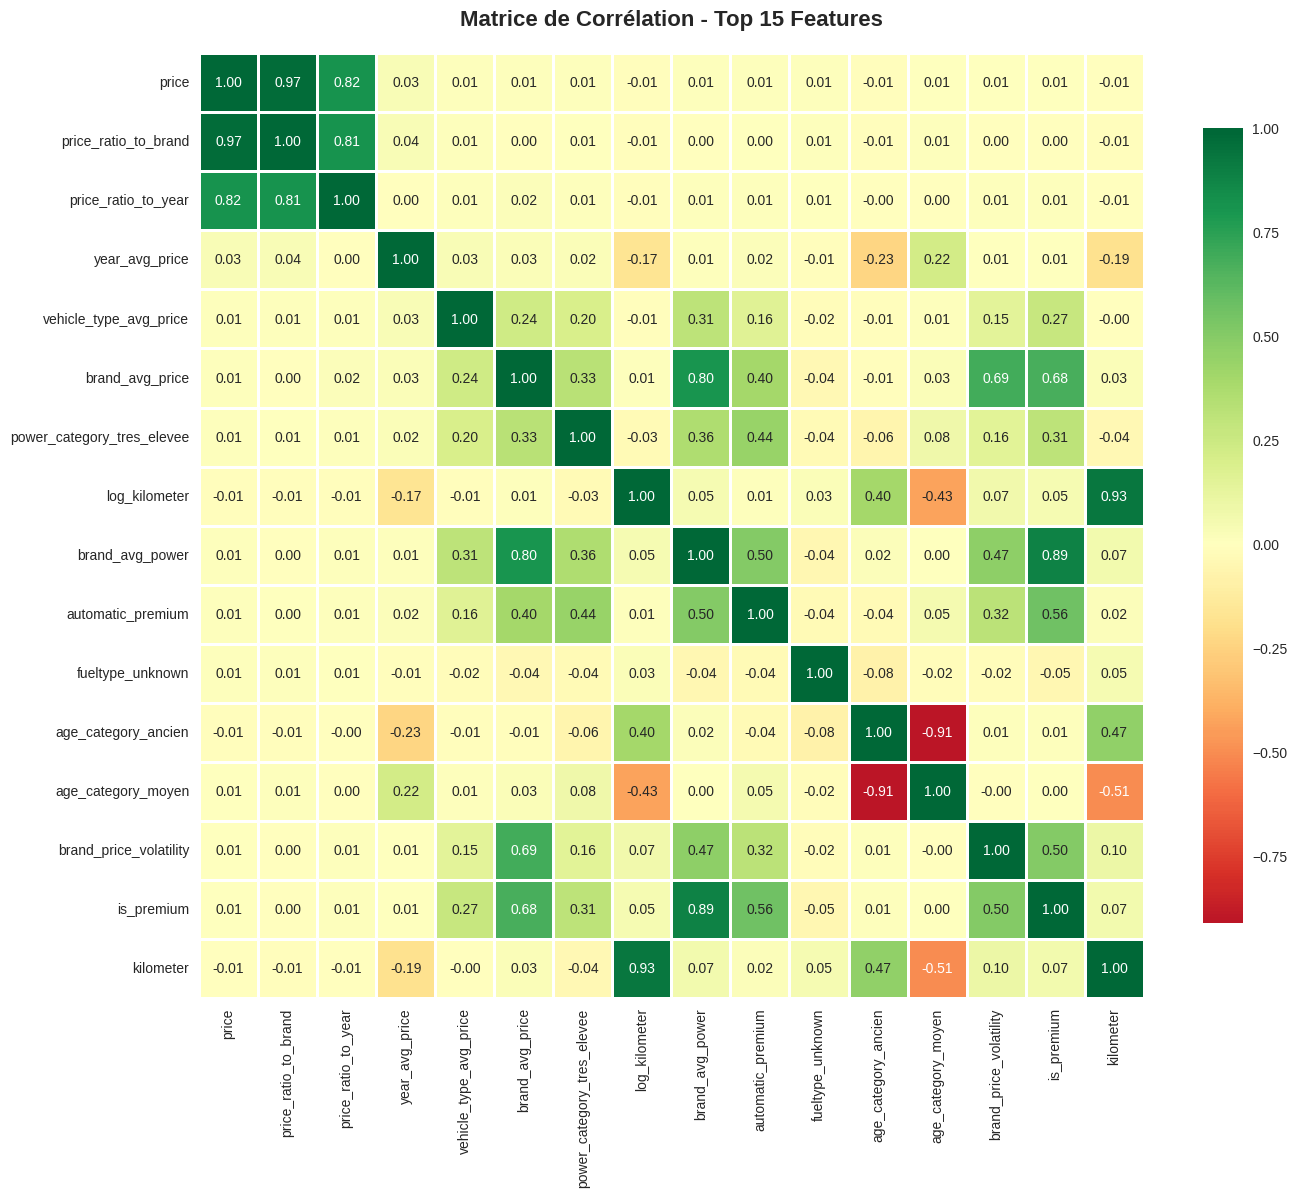

In [116]:
# Heatmap des top features
top_features = correlations.head(16).index.tolist()
plt.figure(figsize=(14, 12))
sns.heatmap(df_final[top_features].corr(),
            annot=True,
            cmap='RdYlGn',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation - Top 15 Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [117]:
# Supprimer les features très corrélées entre elles (multicolinéarité)
print("\nDétection de la multicolinéarité...")
correlation_matrix = df_final.drop('price', axis=1).corr().abs()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Trouver les features avec corrélation > 0.95
redundant = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.95)]

if redundant:
    print(f"\nFeatures redondantes détectées (corrélation >0.95): {redundant}")
    print(f"Ces features seront supprimées pour éviter la multicolinéarité.")
    df_final = df_final.drop(columns=redundant)
    print(f"Shape après suppression: {df_final.shape}")
else:
    print("Aucune feature redondante détectée")


Détection de la multicolinéarité...

Features redondantes détectées (corrélation >0.95): ['age_km_interaction', 'damage_age', 'vehicletype_cabrio', 'vehicletype_kleinwagen', 'vehicletype_kombi', 'vehicletype_limousine', 'vehicletype_suv', 'gearbox_manuell', 'fueltype_benzin', 'fueltype_diesel']
Ces features seront supprimées pour éviter la multicolinéarité.
Shape après suppression: (325766, 90)


---
## 10. Export du Dataset Transformé

Sauvegarde du dataset final pour la modélisation.

In [118]:
print("="*70)
print("EXPORT DU DATASET TRANSFORMÉ")
print("="*70)

EXPORT DU DATASET TRANSFORMÉ


In [119]:
# Vérifications finales
print("\nVérifications finales:")
print(f"Valeurs manquantes: {df_final.isnull().sum().sum()}")
print(f"Valeurs infinies: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Doublons: {df_final.duplicated().sum()}")
print(f"Shape finale: {df_final.shape}")


Vérifications finales:
Valeurs manquantes: 21985
Valeurs infinies: 0
Doublons: 0
Shape finale: (325766, 90)


In [120]:
# Sauvegarder le dataset
output_filename = 'autos_featured.csv'
df_final.to_csv(output_filename, index=False)

print(f"\nDataset sauvegardé: {output_filename}")
import os
print(f"Taille du fichier: {os.path.getsize(output_filename) / (1024*1024):.2f} MB")


Dataset sauvegardé: autos_featured.csv
Taille du fichier: 192.05 MB


In [ ]:
# Test de chargement
print("\nTest de chargement du fichier...")
df_test = pd.read_csv(output_filename)
print(f"Fichier chargé avec succès")
print(f"Shape: {df_test.shape}")
print(f"Colonnes: {df_test.shape[1]}")
print(f"Lignes: {df_test.shape[0]:,}")


Test de chargement du fichier...


---
## 11. Résumé Final

Récapitulatif complet du feature engineering effectué.

In [123]:
print("\n" + "="*80)
print(" "*25 + "RÉSUMÉ FINAL DU FEATURE ENGINEERING")
print("="*80)

print(f"""
STATISTIQUES GÉNÉRALES:
{'='*80}
   Dataset nettoyé (input):  {df.shape[0]:>8,} lignes × {df.shape[1]:>3} colonnes
   Dataset final (output):   {df_final.shape[0]:>8,} lignes × {df_final.shape[1]:>3} colonnes

   Features initiales:       {df.shape[1]:>8}
   Features finales:         {df_final.shape[1]-1:>8} (hors price)
   Features créées:          {(df_final.shape[1]-1) - df.shape[1]:>8}

QUALITÉ DES DONNÉES:
{'='*80}
   Valeurs manquantes:       {df_final.isnull().sum().sum():>8}
   Valeurs infinies:         {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum():>8}
   Doublons:                 {df_final.duplicated().sum():>8}

FEATURES CRÉÉES PAR CATÉGORIE:
{'='*80}

   NUMÉRIQUES (transformations):
      - car_age (âge du véhicule)
      - car_age_squared (âge au carré)
      - km_per_year (km par année)
      - log_kilometer (log du kilométrage)
      - log_power (log de la puissance)
      - power_squared (puissance au carré)
      - power_km_ratio (ratio puissance/km)

   CATÉGORIES (binning):
      - km_category (tres_faible, faible, moyen, eleve, tres_eleve)
      - age_category (neuf, recent, moyen, ancien)
      - power_category (faible, moyenne, elevee, tres_elevee)

   MARQUES (enrichissement):
      - brand_grouped (regroupement des marques rares)
      - is_premium (marques premium)
      - is_economy (marques économiques)
      - is_german (marques allemandes)

   CARACTÉRISTIQUES TECHNIQUES:
      - is_automatic (transmission automatique)
      - is_diesel, is_benzin, is_electric (type de carburant)
      - has_damage (dommages non réparés)
      - is_limousine, is_kombi, is_kleinwagen, is_suv, is_cabrio

   INTERACTIONS (combinaisons):
      - age_km_interaction
      - premium_age, premium_power
      - damage_age
      - automatic_premium
      - diesel_km
      - power_age

   AGRÉGATIONS (statistiques par groupe):
      - brand_avg_price (prix moyen par marque)
      - brand_price_volatility (volatilité du prix)
      - year_avg_price (prix moyen par année)
      - brand_popularity (nombre de voitures par marque)
      - brand_median_km (kilométrage médian par marque)
      - brand_avg_power (puissance moyenne par marque)
      - vehicle_type_avg_price (prix moyen par type)
      - price_ratio_to_brand (ratio prix/moyenne marque)
      - price_ratio_to_year (ratio prix/moyenne année)

TOP 10 FEATURES (corrélation avec le prix):
{'='*80}
""")

# Afficher le top 10
top_10 = correlations.head(11)[1:]  # Exclure price
for i, (feature, corr) in enumerate(top_10.items(), 1):
    print(f"   {i:2}. {feature:35s} -> {corr:.4f}")

print(f"""
PRÊT POUR LA MODÉLISATION:
{'='*80}
   Le fichier '{output_filename}' contient toutes les features transformées.
   Il peut maintenant être utilisé pour entraîner les modèles.

   Pour charger le dataset:
   >>> df = pd.read_csv('{output_filename}')
   >>> X = df.drop('price', axis=1)
   >>> y = df['price']

{'='*80}
FEATURE ENGINEERING TERMINÉ AVEC SUCCÈS
{'='*80}
""")


                         RÉSUMÉ FINAL DU FEATURE ENGINEERING

STATISTIQUES GÉNÉRALES:
   Dataset nettoyé (input):   325,766 lignes ×  61 colonnes
   Dataset final (output):    325,766 lignes ×  90 colonnes
   
   Features initiales:             61
   Features finales:               89 (hors price)
   Features créées:                28

QUALITÉ DES DONNÉES:
   Valeurs manquantes:          21985
   Valeurs infinies:                0
   Doublons:                        0

FEATURES CRÉÉES PAR CATÉGORIE:

   NUMÉRIQUES (transformations):
      - car_age (âge du véhicule)
      - car_age_squared (âge au carré)
      - km_per_year (km par année)
      - log_kilometer (log du kilométrage)
      - log_power (log de la puissance)
      - power_squared (puissance au carré)
      - power_km_ratio (ratio puissance/km)
      
   CATÉGORIES (binning):
      - km_category (tres_faible, faible, moyen, eleve, tres_eleve)
      - age_category (neuf, recent, moyen, ancien)
      - power_category (faible,